# Scratch Notebook

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from prepare import tts
from prepare import prep_telco

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Preparing

In [2]:
#prepared telco for modeling and setting the display to show all columns

pd.set_option('display.max_columns', None)
telco_p = prep_telco()
telco_p

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,signup_date,churn_month,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check,2021-04-21 18:07:34,NaN,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check,2021-04-21 18:07:34,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,2021-09-21 18:07:34,2022-01-31,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2020-12-21 18:07:34,2022-01-31,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check,2021-10-21 18:07:34,2022-01-31,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check,2020-12-21 18:07:34,NaN,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check,2020-03-21 18:07:34,2022-01-31,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check,2021-11-21 18:07:34,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [3]:
#separating into the train, validate, and test using train test split(tts) from prepare
#stratify using 'churn'

telco_train, telco_v, telco_test = tts(telco_p)

stratify=churn


In [4]:
#visualizing the train set

telco_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,signup_date,churn_month,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5295-PCJOO,Male,0,No,Yes,4,Yes,No,Yes,No,No,No,No,No,Yes,49.40,184.4,Yes,Month-to-month,DSL,Electronic check,2021-09-21 18:07:34,2022-01-31,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8087-LGYHQ,Male,0,No,No,9,Yes,No,No,No,Yes,No,Yes,Yes,Yes,94.05,811.65,No,Month-to-month,Fiber optic,Electronic check,2021-04-21 18:07:34,NaN,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0
2885-HIJDH,Male,0,Yes,Yes,69,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,86.90,6194.1,No,Two year,DSL,Bank transfer (automatic),2016-04-21 18:07:34,NaN,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0
7471-WNSUF,Male,0,Yes,No,60,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,24.15,1505.9,No,One year,None,Bank transfer (automatic),2017-01-21 18:07:34,NaN,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
1444-VVSGW,Male,0,Yes,No,70,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,115.65,7968.85,Yes,One year,Fiber optic,Credit card (automatic),2016-03-21 18:07:34,2022-01-31,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


# Explore

gender


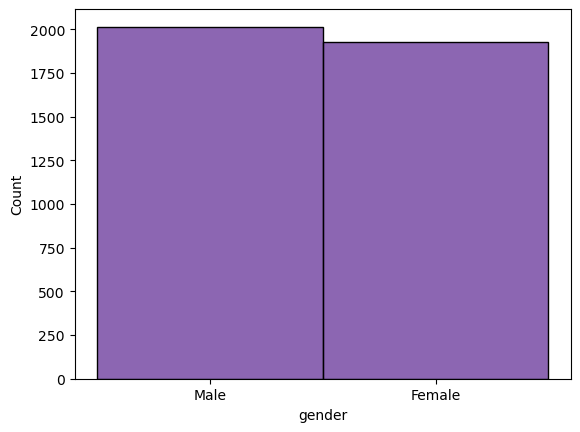

senior_citizen


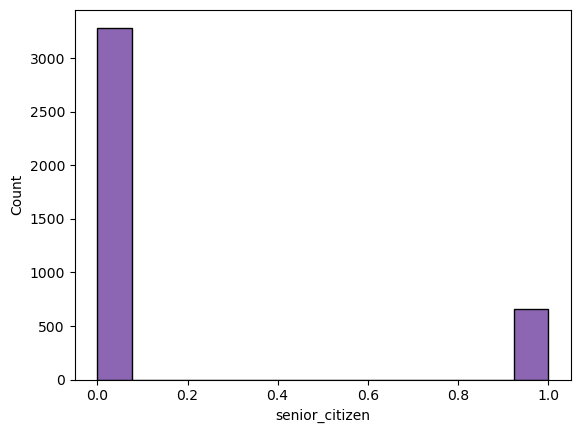

partner


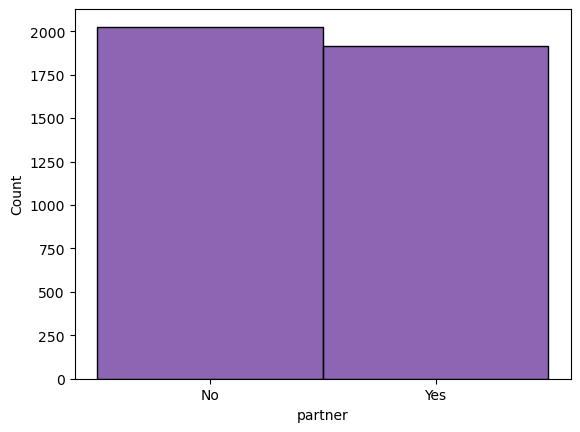

dependents


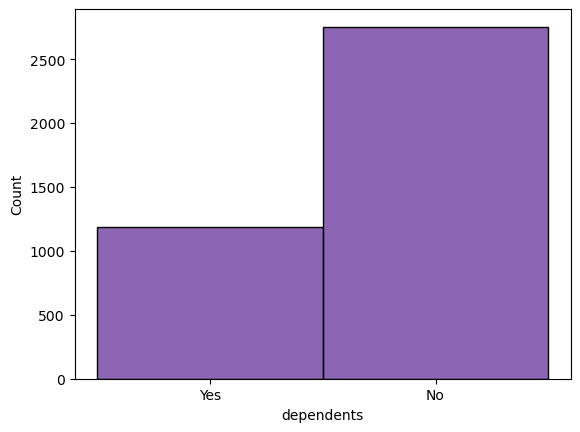

tenure


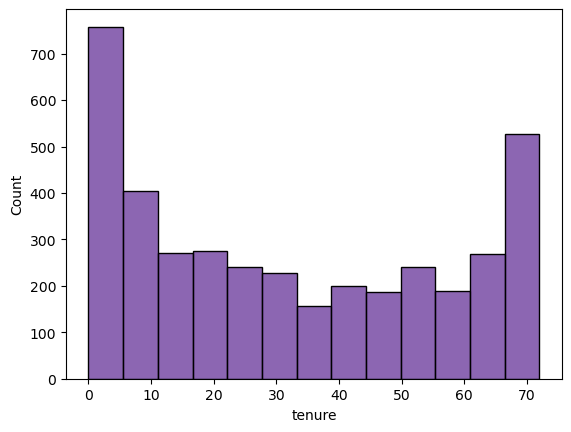

phone_service


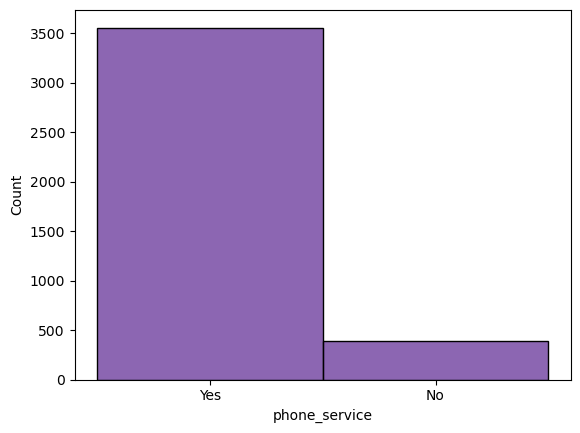

multiple_lines


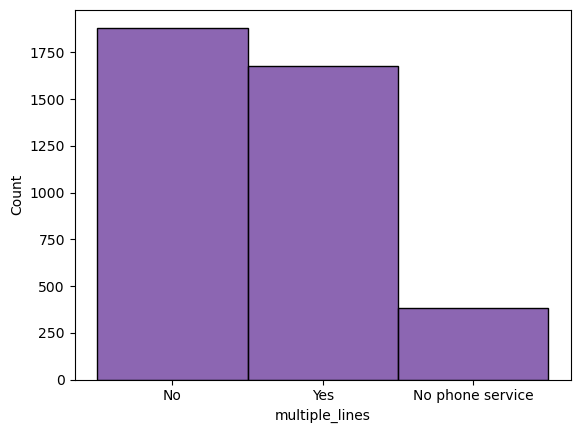

online_security


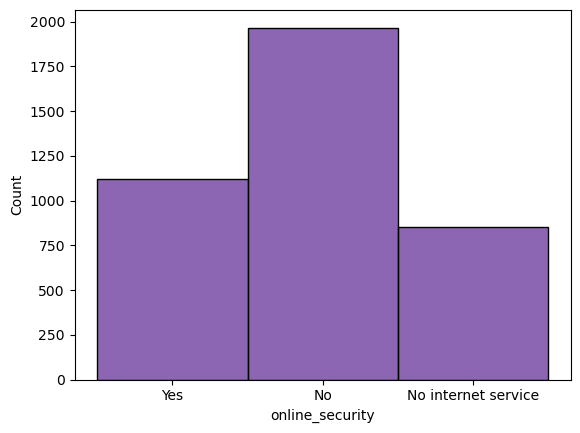

online_backup


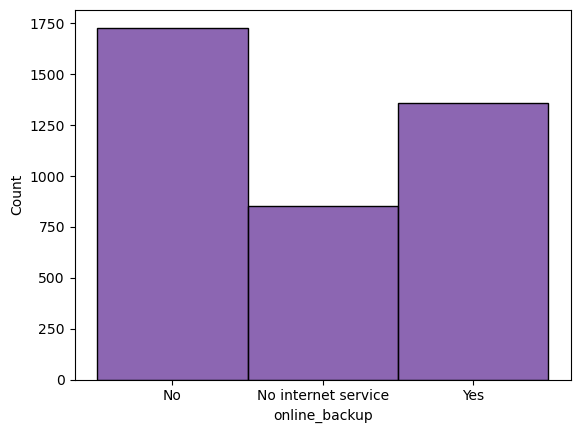

device_protection


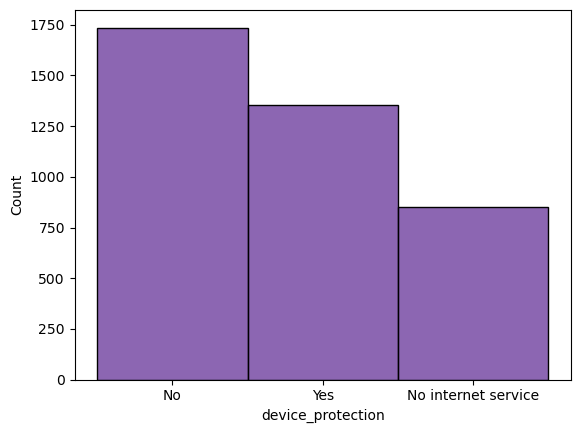

tech_support


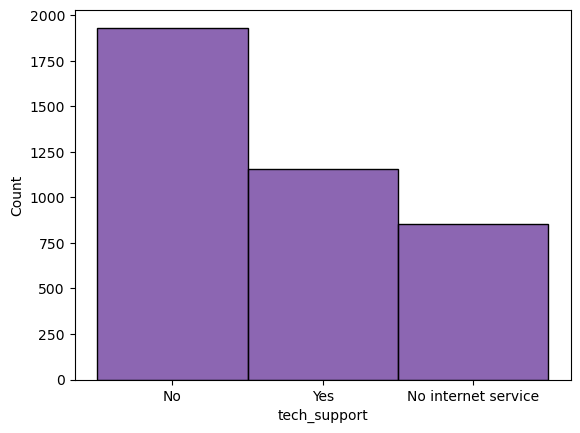

streaming_tv


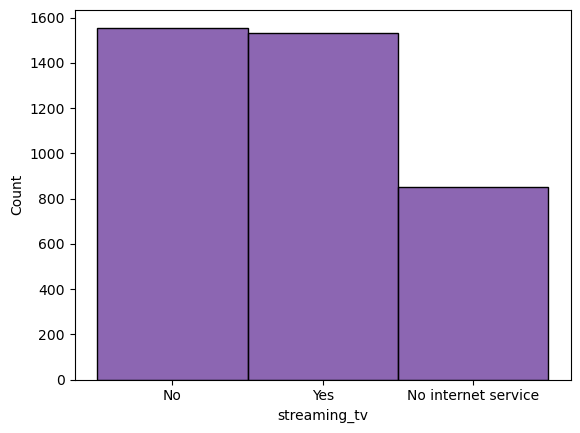

streaming_movies


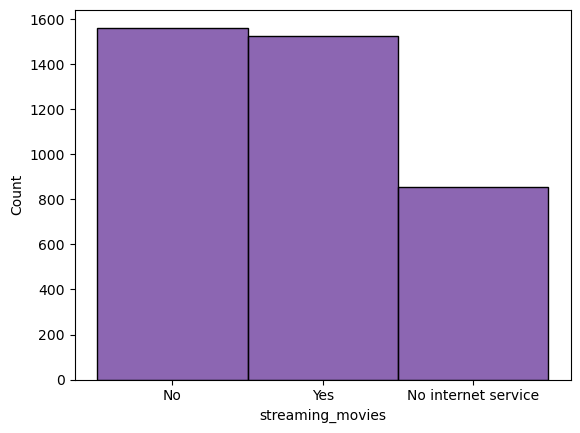

paperless_billing


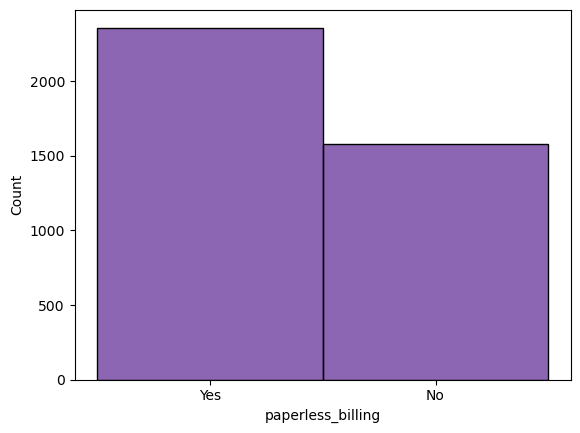

monthly_charges


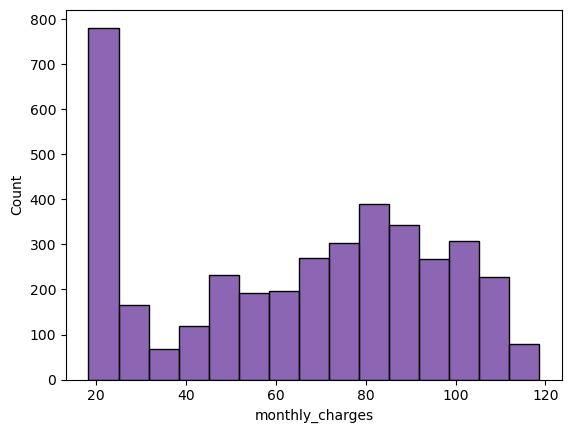

total_charges


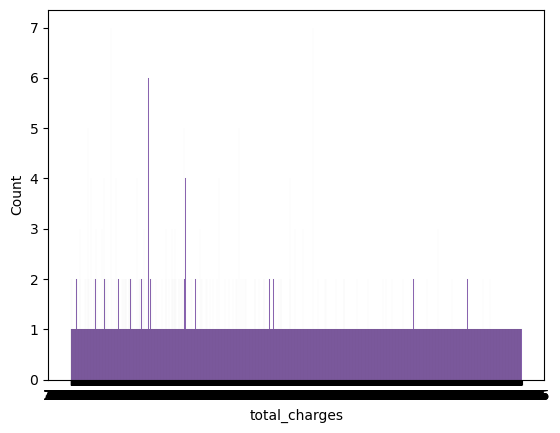

churn


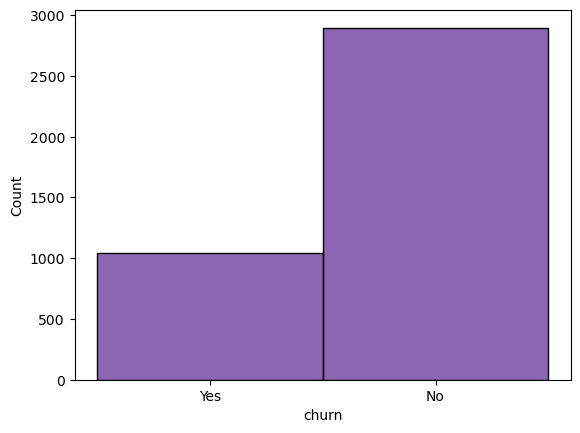

contract_type


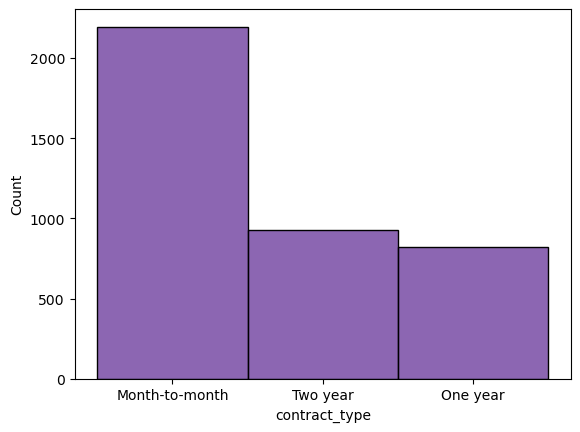

internet_service_type


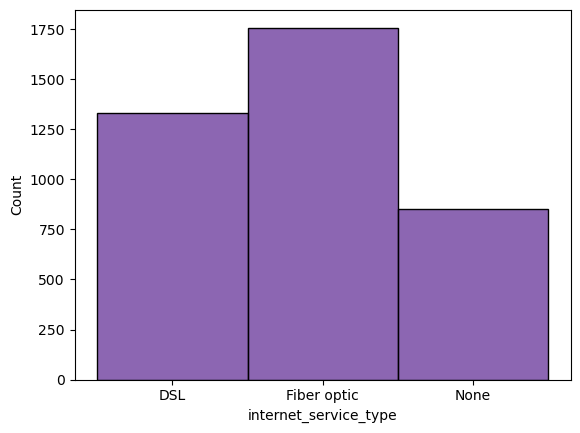

payment_type


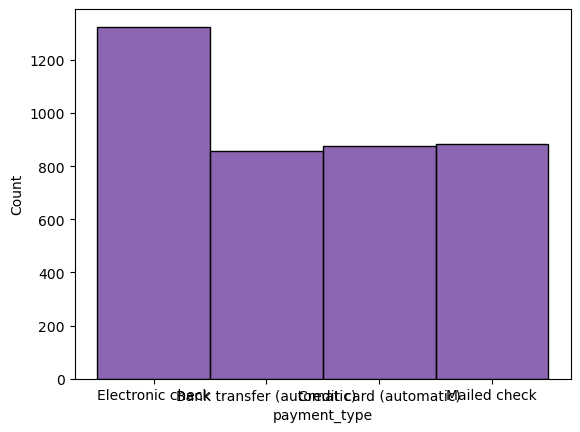

signup_date


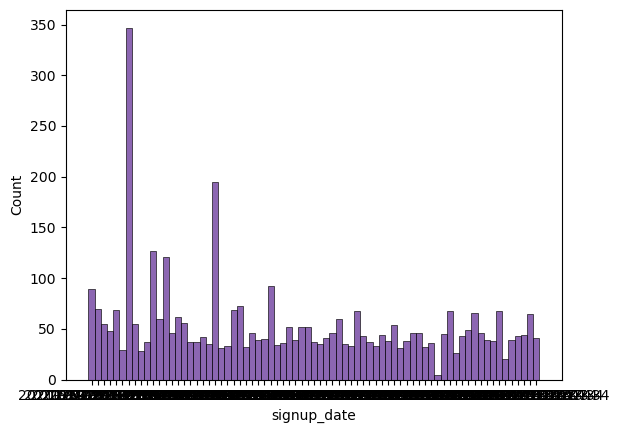

churn_month


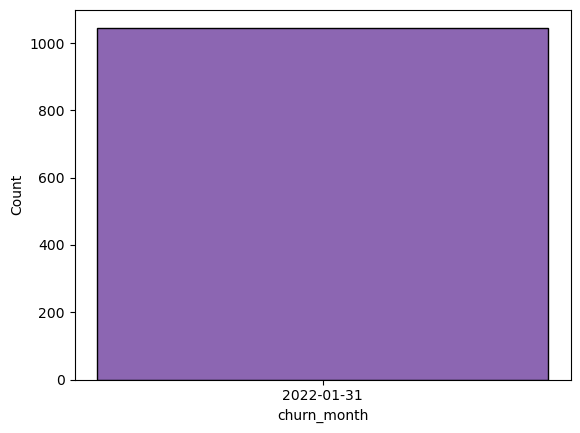

gender_Male


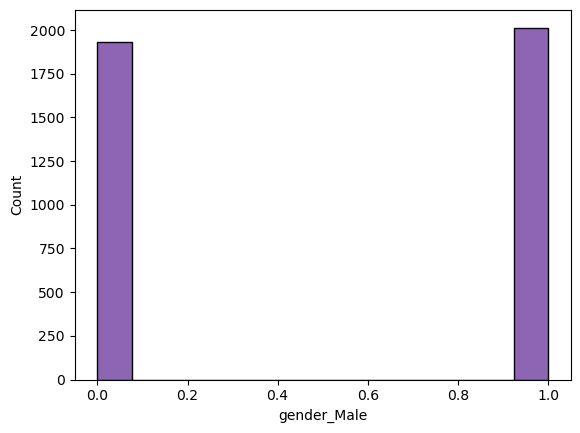

partner_Yes


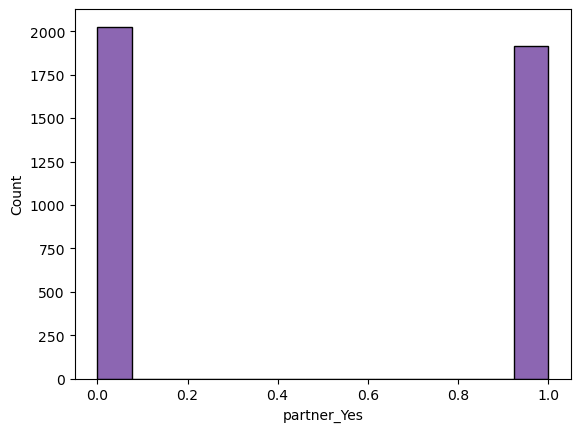

dependents_Yes


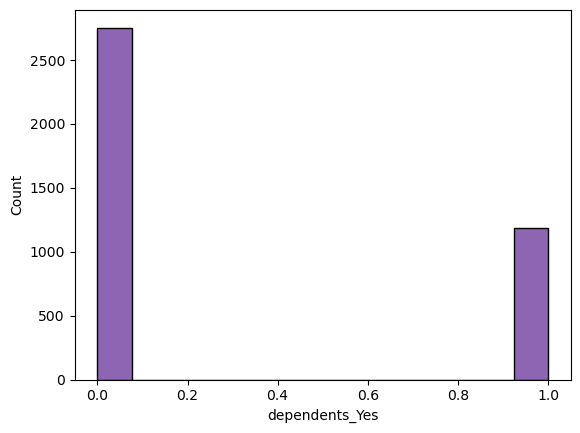

phone_service_Yes


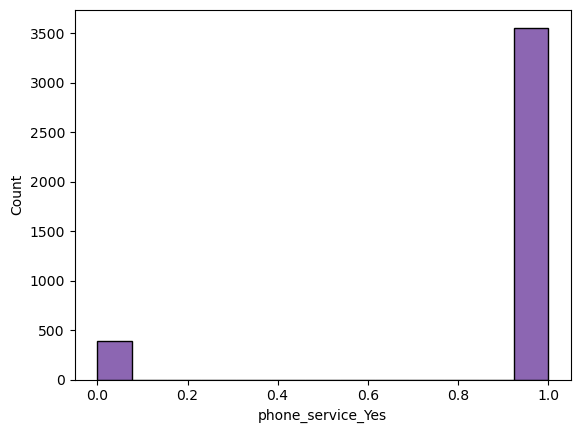

multiple_lines_No phone service


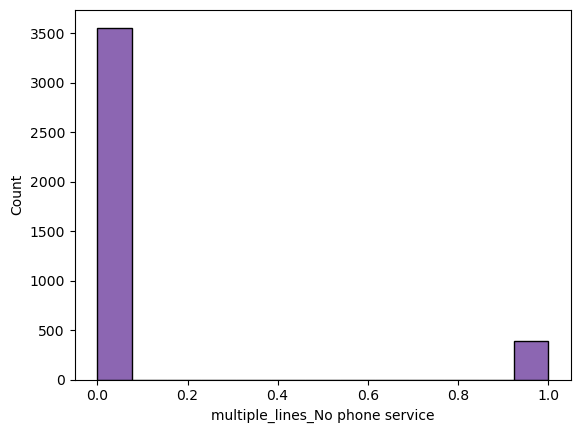

multiple_lines_Yes


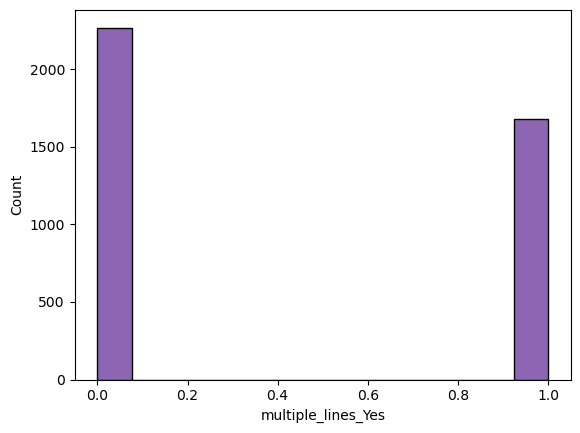

online_security_No internet service


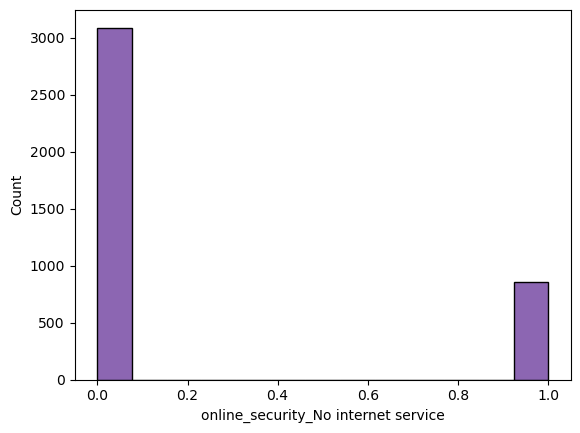

online_security_Yes


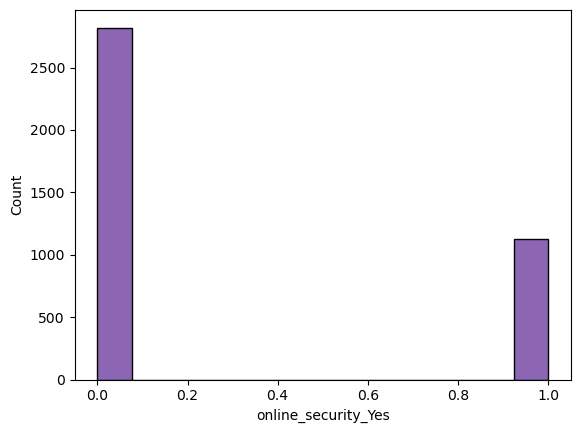

online_backup_No internet service


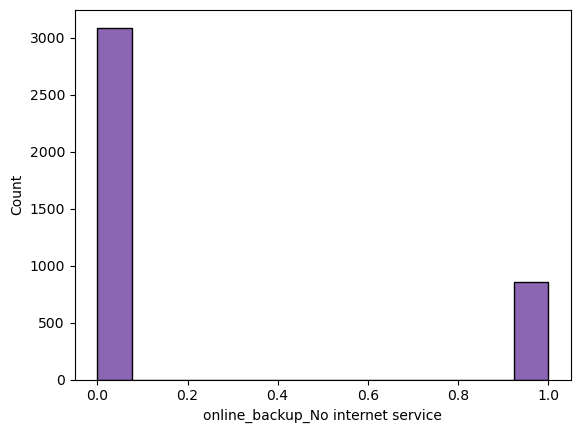

online_backup_Yes


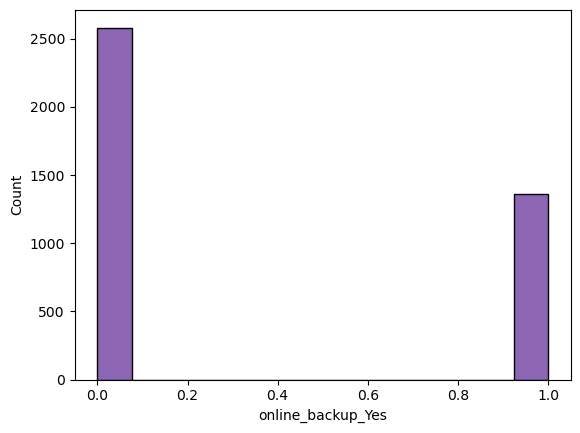

device_protection_No internet service


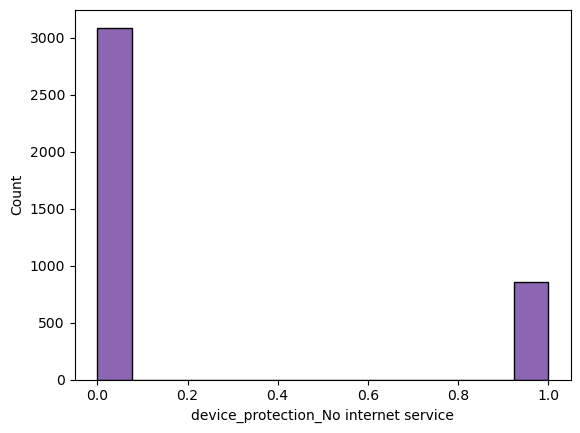

device_protection_Yes


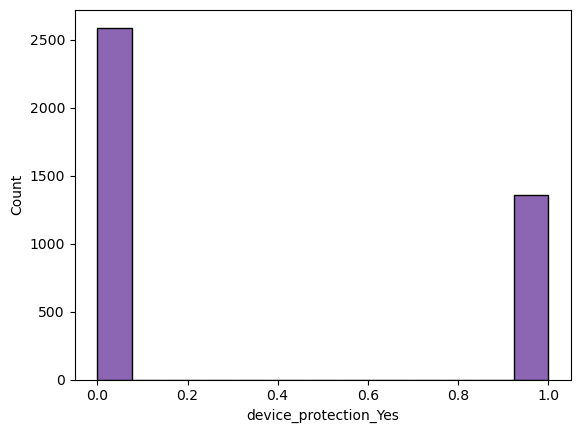

tech_support_No internet service


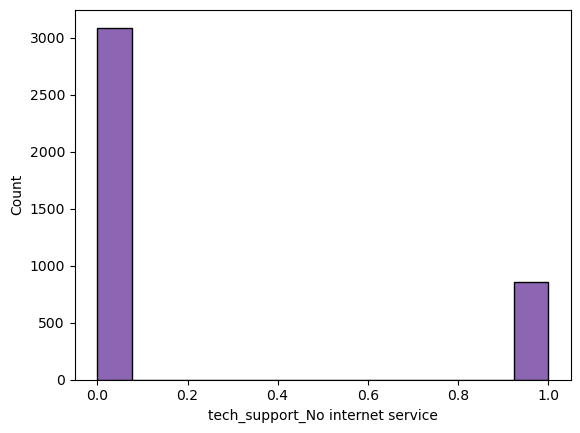

tech_support_Yes


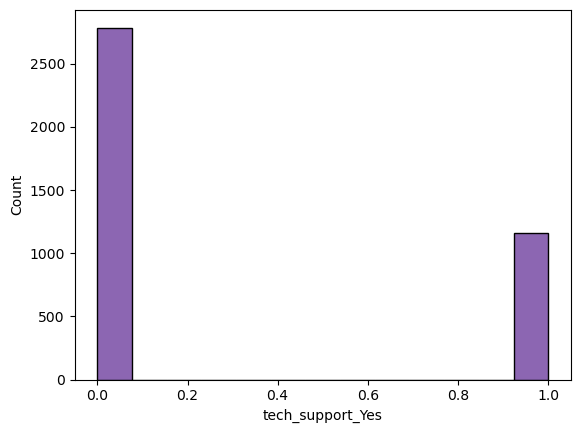

streaming_tv_No internet service


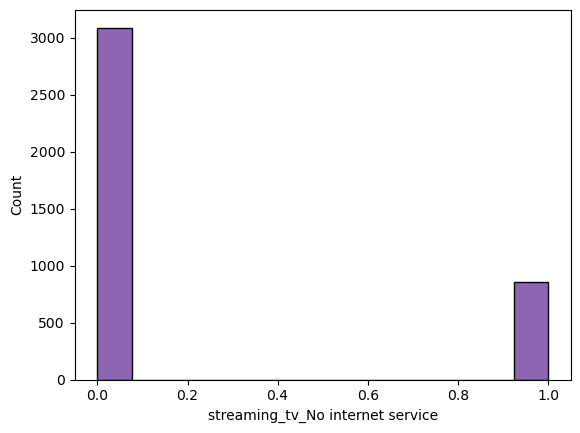

streaming_tv_Yes


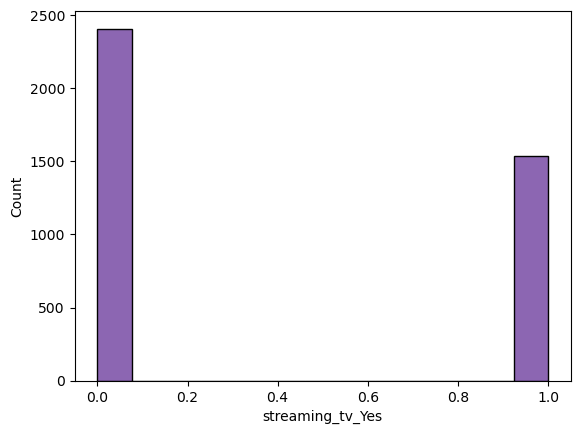

streaming_movies_No internet service


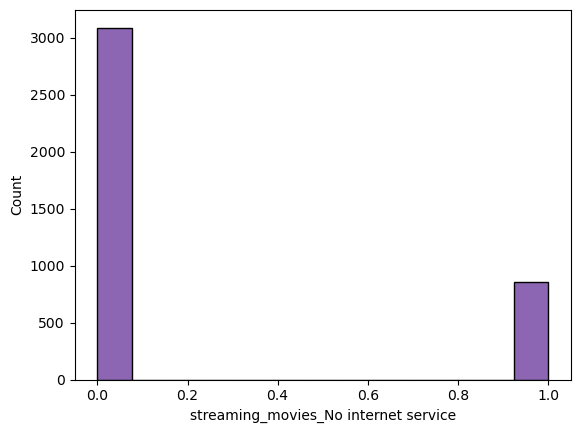

streaming_movies_Yes


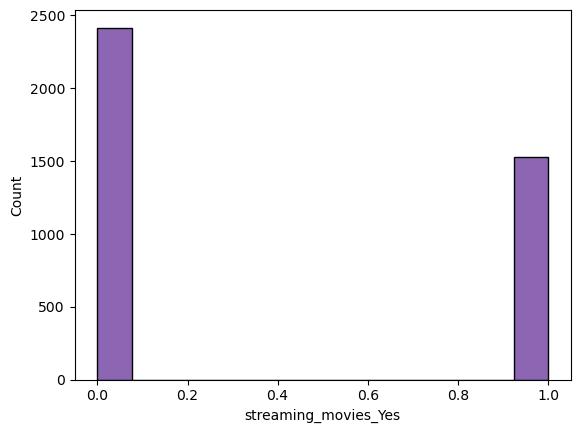

paperless_billing_Yes


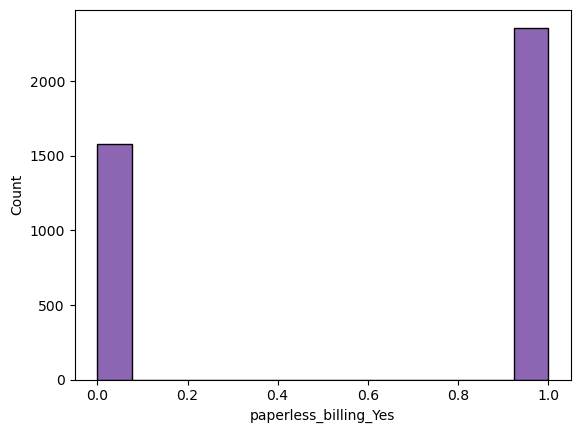

contract_type_One year


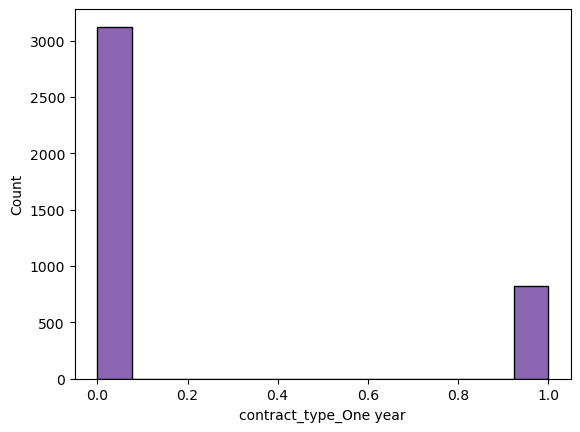

contract_type_Two year


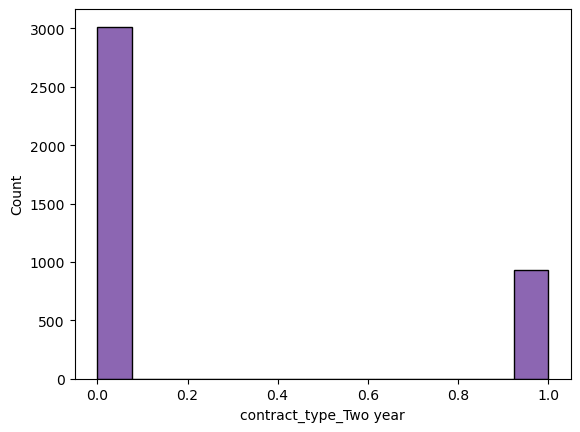

internet_service_type_Fiber optic


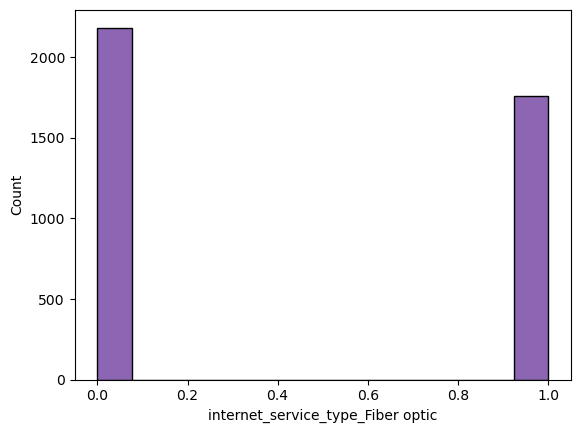

internet_service_type_None


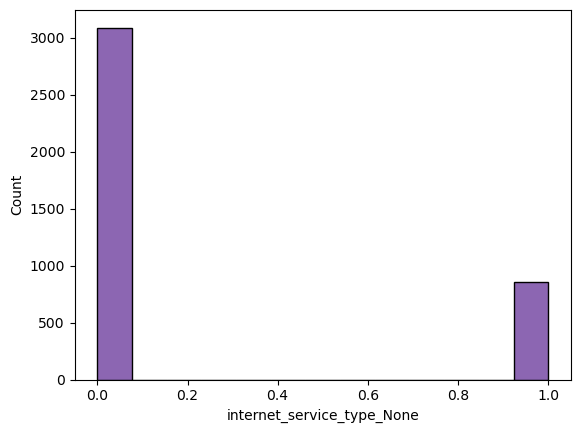

payment_type_Credit card (automatic)


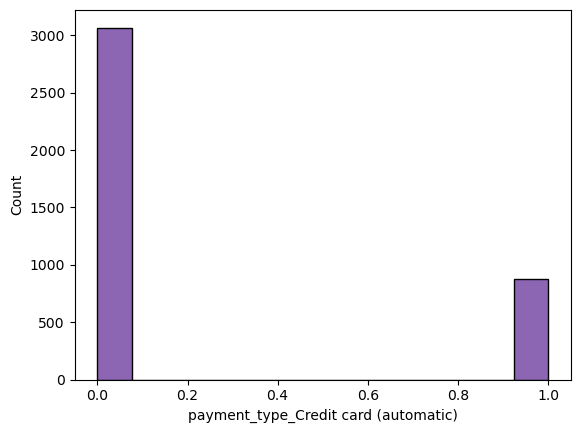

payment_type_Electronic check


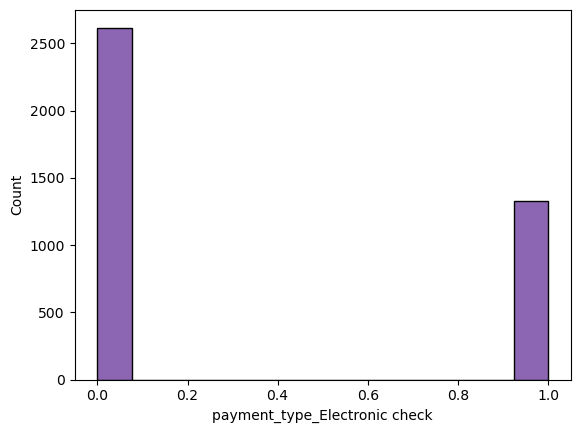

payment_type_Mailed check


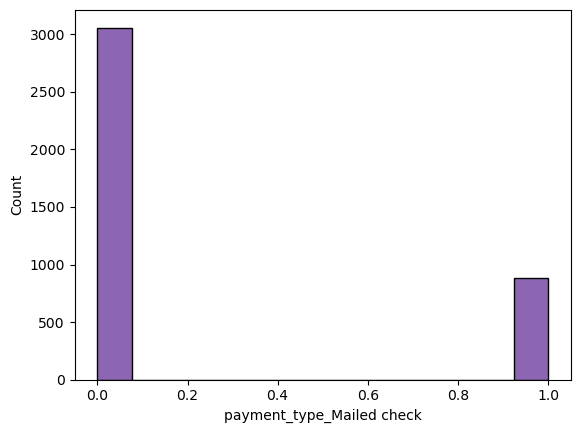

In [5]:
# making charts to look for drivers
for col in telco_train:
    print(col)
    sns.histplot(x=col, data=telco_train, color= 'rebeccapurple')
    plt.show()

### A few charts stood out to me worth investigating:  
 -tenure  
 -dependents  
 -online security   
 -monthly charges  
 -internet service type  
(I'm starting to think Telco has bad internet)

<AxesSubplot:xlabel='churn', ylabel='Count'>

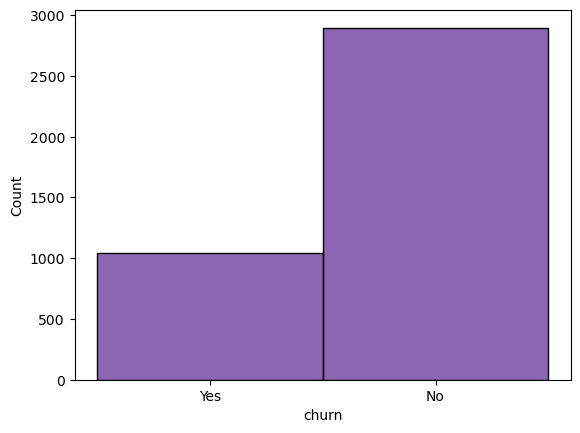

In [6]:
#visualizing specifically the churn
sns.histplot(x='churn', data=telco_train, color='rebeccapurple')

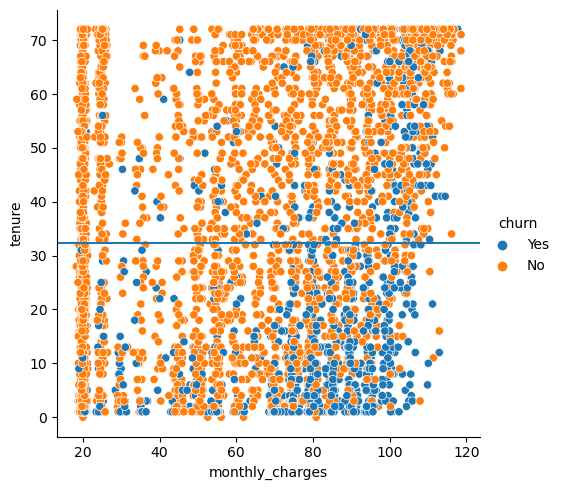

In [7]:
#plotting numeric catagories that I found interesting from above

sns.relplot(x= 'monthly_charges', 
            y= 'tenure', 
            data=telco_train, 
            color='seagreen', 
            hue='churn')
plt.axhline(y=np.mean(telco_train['tenure']))
plt.show()

In [8]:
#finding overall average monthly charges

tot_mean= np.mean(telco_train['monthly_charges'])
tot_mean

64.97134161805721

# Question 1:
# Are customers with low tenure more likely to churn?
$H_0$- Customers that churn do not have significantly lower tenure.  
$H_a$- Customers that churn have significantly lower tenure.

In [9]:
#Set alpha

alpha=.05

<AxesSubplot:xlabel='churn', ylabel='tenure'>

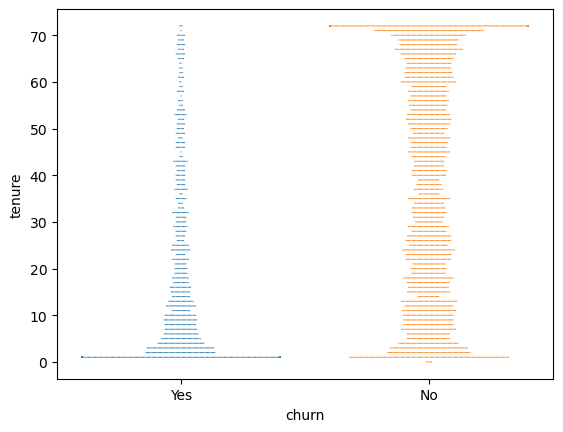

In [10]:
#visualizing with a swarm plot

sns.swarmplot(x='churn', y='tenure', data=telco_train, size=.825)

<AxesSubplot:xlabel='churn', ylabel='tenure'>

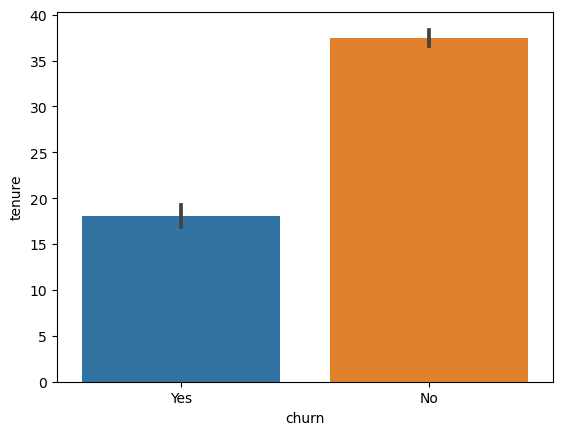

In [11]:
#visualizing using a bar plot

sns.barplot(x='churn', y='tenure', data=telco_train)

In [12]:
#getting the mean tenure for each discreet catagory

ten_yes= telco_train[telco_train['churn'] == 'Yes']
ten_no= telco_train[telco_train['churn'] == 'No']

ten_yes_m= np.mean(ten_yes['tenure'])
ten_no_m= np.mean(ten_no['tenure'])

In [13]:
ten_yes_m

18.038240917782026

In [14]:
ten_no_m

37.49499482222989

<AxesSubplot:>

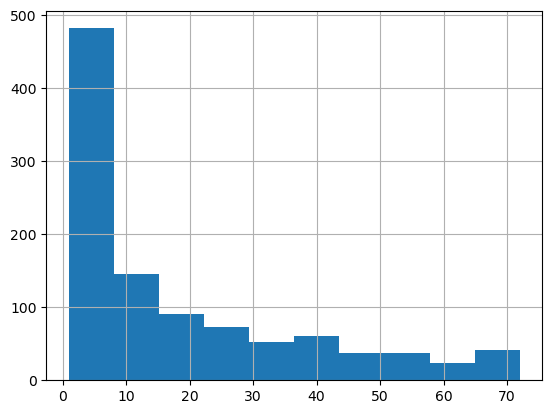

In [15]:
#checking for normal distruibutions in churn and tenure
#histogram of tenure for customers that have churned

ten_yes['tenure'].hist()

<AxesSubplot:>

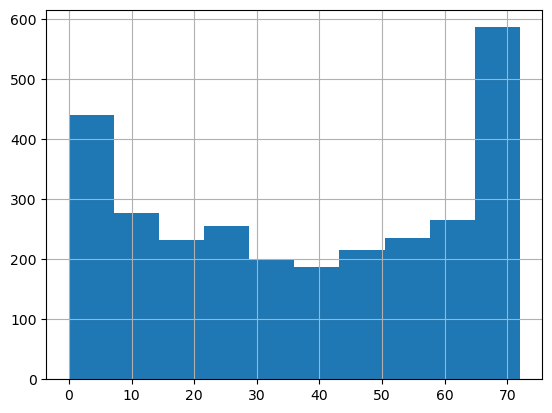

In [16]:
#histogram of tenure for customers that have not churned

ten_no['tenure'].hist()

### distributions are not normal so I will use a mannwhitney

In [17]:
#using a mannwhitneyu to test for significance

test_statistic, p= stats.mannwhitneyu(x=ten_yes['tenure'], y= ten_no['tenure'], 
                                     alternative= 'less')
print(test_statistic, f'p={p}')

796577.0 p=3.589116306723641e-115


In [18]:
#check if the p value is less than our alpha

if p < alpha:
    print('reject the null hypothesis')
else:
    print('do not reject the null hypothesis')

reject the null hypothesis


**Takeaways**  
Because the p value is less than the alpha value, we can say with confidence that customers that churn have significantly lower tenure. The average tenure of customers that churn (\~18) is significantly lower than customers that don't churn  
(~ 37.5).

# Question 2:
# Are customers without dependents more likely to churn?
$H_0$- Customers that churn are not more likely to have no dependents  
$H_a$- Customers that churn are more likely to have no dependents

<AxesSubplot:xlabel='dependents', ylabel='Count'>

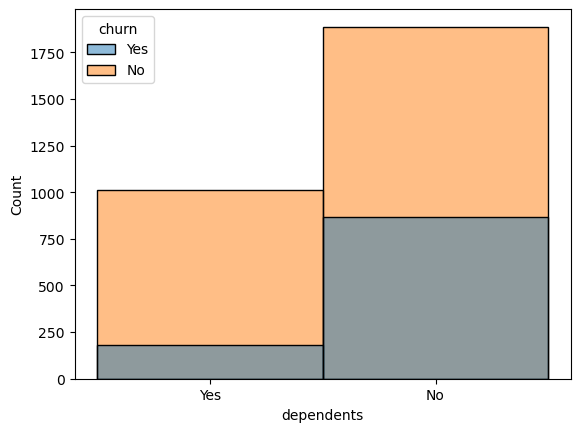

In [19]:
#visualizing customers with dependents

sns.histplot(x='dependents', 
             data= telco_train,
             hue= 'churn')

In [20]:
#generating observed results

observed= pd.crosstab(telco_train.churn, telco_train.dependents)
observed

dependents,No,Yes
churn,,
No,1887,1010
Yes,867,179


In [21]:
#separating churn and no churn

churn_yes= telco_train[telco_train['churn'] == 'Yes']
churn_no= telco_train[telco_train['churn'] == 'No']

In [22]:
#getting the dependents columns

yes_depend= churn_yes['dependents']
no_depend= churn_no['dependents']

In [23]:
#doing a chi^2 test on the observed results

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [24]:
#assigning the expected values to a dataframe
expected=pd.DataFrame(data=expected, 
                      index=['no churn', 'churn'], 
                      columns=['no dependents', 'dependents'])

In [25]:
#showing the results of the chi^2 test

print('observed values\n')
print(observed)
print('--------------\n')
print('expected values\n')
print(expected)
print('--------------\n')
print(f'chi^2= {chi2: .4f}')
print(f'p    = {p}')

observed values

dependents    No   Yes
churn                 
No          1887  1010
Yes          867   179
--------------

expected values

          no dependents  dependents
no churn    2023.418209  873.581791
churn        730.581791  315.418209
--------------

chi^2=  114.1326
p    = 1.2188051282217693e-26


In [26]:
#check if the p value is less than our alpha

if p < alpha:
    print('reject the null hypothesis')
else:
    print('do not reject the null hypothesis')

reject the null hypothesis


**Takeaways**  
The p value is lower than the alpha value, so we reject the null hypothesis. Customers that don't have dependents are more likely to churn.

# Question 3:
# Are customers with internet service more likely to churn?
$H_0$- Customers that churn are not significantly more likely to have internet service  
$H_a$- Customers that churn are significantly more likely to have internet service

<AxesSubplot:xlabel='internet_service_type', ylabel='Count'>

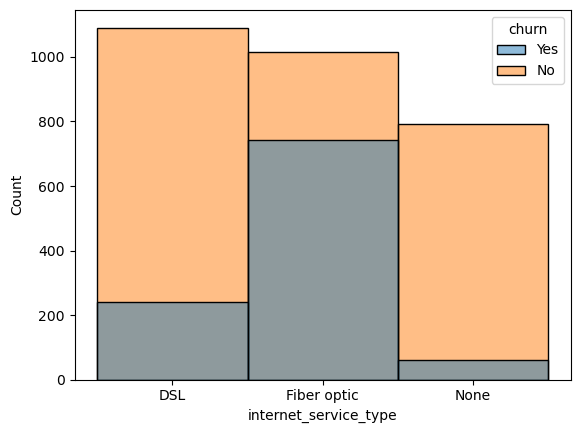

In [27]:
#visualizing customers with internet service

sns.histplot(x='internet_service_type', 
             data= telco_train,
             hue= 'churn')

In [28]:
#adding a column for yes internet or no internet

d={'DSL': 'yes', 'Fiber optic': 'yes', 'None': 'no'}
telco_train['has_internet']= telco_train['internet_service_type'].map(d)

<AxesSubplot:xlabel='has_internet', ylabel='Count'>

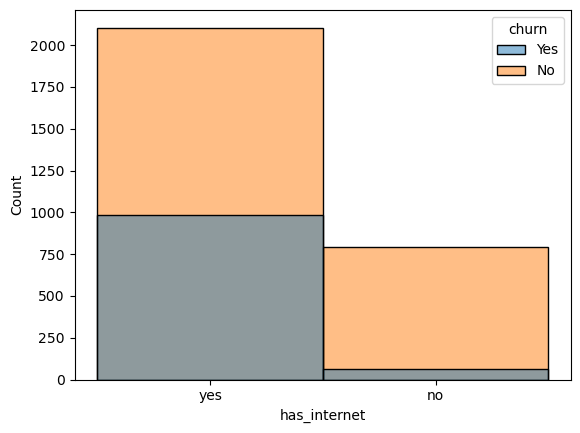

In [29]:
#visualization for customers that have churned and not that do and don't have internet

sns.histplot(x='has_internet', 
             data= telco_train,
             hue= 'churn')

In [30]:
#generating an observed crosstab

observed= pd.crosstab(telco_train.churn, telco_train.has_internet)
observed

has_internet,no,yes
churn,,
No,792,2105
Yes,61,985


In [31]:
#doing a chi^2 test on the observed results

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [32]:
#assigning the expected values to a dataframe

expected=pd.DataFrame(data=expected, 
                      index=['no churn', 'churn'], 
                      columns=['no internet', 'internet'])

In [33]:
#showing the results of the chi^2 test

print('observed values\n')
print(observed)
print('--------------\n')
print('expected values\n')
print(expected)
print('--------------\n')
print(f'chi^2= {chi2: .4f}')
print(f'p    = {p}')

observed values

has_internet   no   yes
churn                  
No            792  2105
Yes            61   985
--------------

expected values

          no internet     internet
no churn   626.715952  2270.284048
churn      226.284048   819.715952
--------------

chi^2=  208.4121
p    = 3.0500157004650695e-47


In [34]:
#check if the p value is less than our alpha

if p < alpha:
    print('reject the null hypothesis')
else:
    print('do not reject the null hypothesis')

reject the null hypothesis


**Takeaway**  
The p value is low so we reject the null hypothesis. Customers that churn are significantly more likely to have internet service. Maybe Telco has bad internet quality.

# Question 4:
# Are customers with high monthly charges more likely to churn?
$H_0$- Customers that churn are not significantly more likely to have higher monthly charges  
$H_a$- Customers that churn are significantly more likely to have higher monthly charges

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

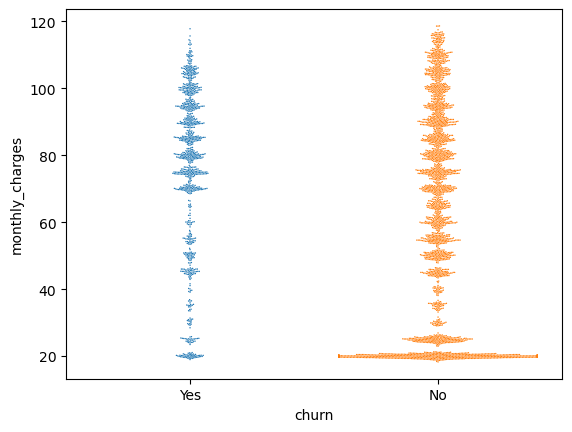

In [35]:
#visualizing monthly charges with churn

sns.swarmplot(y='monthly_charges',x='churn', data=telco_train, size=1)

In [36]:
#mean monthly charges for customers that have and have not churned

print(np.mean(ten_yes['monthly_charges']))
print(np.mean(ten_no['monthly_charges']))

75.3788240917782
61.21358301691398


<AxesSubplot:>

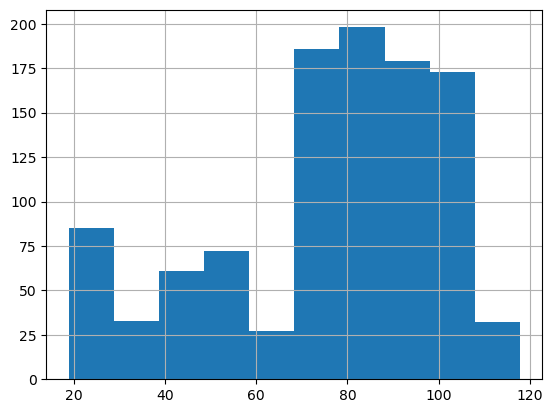

In [37]:
#checking for normal distribution

ten_yes['monthly_charges'].hist()

<AxesSubplot:>

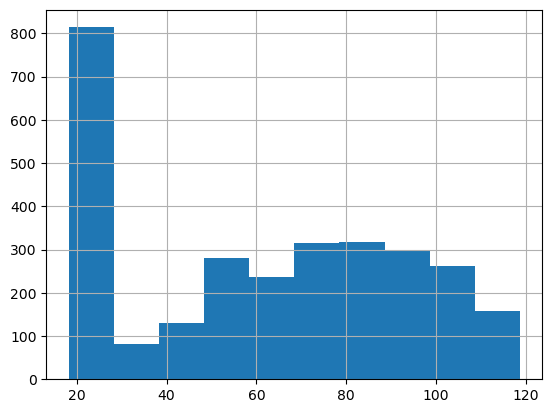

In [38]:
ten_no['monthly_charges'].hist()

### distributions are not normal so I will use a mannwhitney

In [39]:
test_statistic, p= stats.mannwhitneyu(x= ten_yes['monthly_charges'], 
                                      y= ten_no['monthly_charges'], 
                                      alternative= 'greater')
print(test_statistic, f'p={p}')

1914548.5 p=5.15662627815242e-37


In [40]:
#check if the p value is less than our alpha

if p < alpha:
    print('reject the null hypothesis')
else:
    print('do not reject the null hypothesis')

reject the null hypothesis


**Takeaways**  
The p value is lower than the alpha so we reject the null hypothesis. Customers that churn are significantly more likely to have a higher monthly charge.

# Modeling

In [41]:
#dropping string columns that have been made into dummy vars
telco_train.drop(columns=['gender', 'dependents', 'partner', 'phone_service', 'multiple_lines',
                          'online_security', 'online_backup', 'device_protection', 'tech_support',
                          'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type',
                          'internet_service_type', 'payment_type', 'churn_month', 'total_charges',
                          'signup_date', 'has_internet'], inplace=True)

telco_v.drop(columns=['gender', 'dependents', 'partner', 'phone_service', 'multiple_lines',
                          'online_security', 'online_backup', 'device_protection', 'tech_support',
                          'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type',
                          'internet_service_type', 'payment_type', 'churn_month', 'total_charges',
                          'signup_date'], inplace=True)

telco_test.drop(columns=['gender', 'dependents', 'partner', 'phone_service', 'multiple_lines',
                          'online_security', 'online_backup', 'device_protection', 'tech_support',
                          'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type',
                          'internet_service_type', 'payment_type', 'churn_month', 'total_charges',
                          'signup_date'], inplace=True)

In [42]:
#changing the strings in the 'churn' column to integers

for w in telco_train['churn']:
    if w == 'Yes':
        telco_train['churn'].replace('Yes', 1, inplace=True)
    else:
        telco_train['churn'].replace('No', 0, inplace=True)
        
for w in telco_v['churn']:
    if w == 'Yes':
        telco_v['churn'].replace('Yes', 1, inplace=True)
    else:
        telco_v['churn'].replace('No', 0, inplace=True)
        
for w in telco_test['churn']:
    if w == 'Yes':
        telco_test['churn'].replace('Yes', 1, inplace=True)
    else:
        telco_test['churn'].replace('No', 0, inplace=True)

In [43]:
telco_train.head()

,senior_citizen,tenure,monthly_charges,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5295-PCJOO,0,4,49.40,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8087-LGYHQ,0,9,94.05,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0
2885-HIJDH,0,69,86.90,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0
7471-WNSUF,0,60,24.15,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
1444-VVSGW,0,70,115.65,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [44]:
#separating train, validate, and test into x & y

x_train = telco_train.drop(columns=['churn'])
y_train = telco_train['churn']

x_val = telco_v.drop(columns=['churn'])
y_val = telco_v['churn']

x_test = telco_test.drop(columns=['churn'])
y_test = telco_test['churn']

In [45]:
#establishing baseline accuracy

#making base column
telco_train['base']= 0

#making the confusion matrix with actual churn results and baseline
cm= confusion_matrix(y_train, telco_train['base'])

#computing the accuracy
tn, fp, fn, tp= cm.ravel()

accuracy = (tp+tn) / (tn+fp+fn+tp)
accuracy

0.7347197565305605

In [46]:
cm

array([[2897,    0],
       [1046,    0]])

In [47]:
#visualizing the best models

metrics=[]

for n in range(1, 11):
    for i in range(2, 11):
                                                        #making the model
        rf= RandomForestClassifier(max_depth=i,
                                   min_samples_leaf=n,
                                   random_state=8675309)
                                                        #fitting the model
        rf=rf.fit(x_train, y_train)
                                                        #evaluate accuracy on train and validate
        in_sample_accuracy= rf.score(x_train, y_train)
        out_of_sample_accuracy= rf.score(x_val, y_val)
        
                                                        #set output
        output= {
            'min_samples_per_leaf': n,
            'max_depth': i,
            'train_accuracy': in_sample_accuracy,
            'validate_accuracy': out_of_sample_accuracy
        }
        
                                                        #appending the output to a list
        metrics.append(output)

In [48]:
#turning metrics into a dataframe
df= pd.DataFrame(metrics)

#adding a difference column
df['difference']= df['train_accuracy']-df['validate_accuracy']

#sorting (decending) and taking the top results
df.sort_values(by=['validate_accuracy'], ascending=False).head(10)

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
50,6,7,0.819427,0.801892,0.017534
5,1,7,0.825514,0.801892,0.023621
44,5,10,0.843267,0.801892,0.041374
59,7,7,0.818920,0.801892,0.017027
23,3,7,0.823738,0.801892,0.021846
4,1,6,0.816130,0.801301,0.014829
42,5,8,0.830079,0.801301,0.028778
33,4,8,0.832615,0.801301,0.031314
32,4,7,0.823231,0.801301,0.021930
22,3,6,0.816383,0.800710,0.015674


In [49]:
df.shape

(90, 5)

In [50]:
#knn models

metrics=[]

for n in range(1, 11):
                                            #create model
    knn= KNeighborsClassifier(n_neighbors= n)
                                            #fit the model
    knn.fit(x_train, y_train)
                                            #get accuracy
    in_sample_accuracy= knn.score(x_train, y_train)
    out_of_sample_accuracy= knn.score(x_val, y_val)
                                            #generating output dictionary
    output={'n_neighbors': n,
            'in_sample_accuracy': in_sample_accuracy,
            'out_of_sample_accuracy':out_of_sample_accuracy
    }
                                            #assigning output dictionary to list
    metrics.append(output)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [51]:
#assigning the metrics to a dataframe
df= pd.DataFrame(metrics)

#adding a difference column
df['difference']=df['in_sample_accuracy']-df['out_of_sample_accuracy']

#displaying the results in a readable order
df.sort_values('out_of_sample_accuracy', ascending=False).head(10)

,n_neighbors,in_sample_accuracy,out_of_sample_accuracy,difference
9,10,0.820441,0.769959,0.050483
8,9,0.820441,0.762271,0.058170
3,4,0.847578,0.761088,0.086490
7,8,0.823738,0.761088,0.062650
5,6,0.829064,0.760497,0.068567
6,7,0.828303,0.759314,0.068989
1,2,0.873193,0.755766,0.117427
4,5,0.838955,0.753992,0.084963
2,3,0.871671,0.748669,0.123002
0,1,0.997210,0.719692,0.277518


In [52]:
metrics= []

for n in range(1, 21):
    for i in range(2, 21):
                                                    #build the model
        dec_tree= DecisionTreeClassifier(max_depth= i,
                                         min_samples_leaf= n)
                                                    #fit the model
        dec_tree.fit(x_train, y_train)
                                                    #get accuracy from in and out of sample data
        in_sample= dec_tree.score(x_train, y_train)
        out_of_sample= dec_tree.score(x_val, y_val)
                                                    #assigning the output to a dictionary
        output={
            'max_depth': i,
            'min_samples_leaf': n,
            'train_accuracy': in_sample,
            'validate_accuracy': out_of_sample
        }
                                                    #appending the output dictionary to the empty metrics list
        metrics.append(output)

In [53]:
#visualizing the metrics as a dataframe
df= pd.DataFrame(metrics)

#creating the difference column for train and validate accuracy
df['difference']= df['train_accuracy']-df['validate_accuracy']

#sorting the dataframe to make it easier to read
df.sort_values('validate_accuracy', ascending=False).head(10)

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
41,5,3,0.807000,0.791248,0.015752
3,5,1,0.807253,0.791248,0.016006
22,5,2,0.807000,0.791248,0.015752
174,5,10,0.805985,0.789474,0.016512
136,5,8,0.805985,0.789474,0.016512
250,5,14,0.805985,0.789474,0.016512
288,5,16,0.805985,0.789474,0.016512
345,5,19,0.805985,0.789474,0.016512
60,5,4,0.807000,0.789474,0.017526
231,5,13,0.805985,0.789474,0.016512


### modeling conclusion
After running decision tree, knn, and random forest models:  
    - knn was the worst performing with the best model having a train accuracy of .82 and validate accuracy of .77. This was using 10 nearest neighbors  
    - decision tree was a bit better than knn. The best decision tree had a train accuracy of .81 and a validate accuracy of .79. This was using a max depth of 5 and the number of min samples per leaf being 3.  
    - The random forest performed the best. My top 3 models are from the random forest classifier. The best model has a train accuracy of .82 and a validate accuracy of .80. This was in the model having a max depth of 7 and the min samples per leaf were 6.
    

### Running test on my best model

In [54]:
#Creating the model

rf= RandomForestClassifier(max_depth=7,
                           min_samples_leaf=6,
                           random_state=8675309)

In [55]:
#fitting the model
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, random_state=8675309)

In [56]:
#evaluating the model with the test set
rf.score(x_test, y_test)

0.7934705464868701

In [83]:
x_test.reset_index()

,customer_id,senior_citizen,tenure,monthly_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,5811-IWXYM,0,52,101.25,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0
1,9592-ERDKV,0,37,79.25,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
2,2550-QHZGP,0,7,19.50,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2180-DXNEG,0,12,96.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0
4,5542-DHSXL,0,4,54.70,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,6928-ONTRW,0,72,19.70,0,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0
1405,0952-KMEEH,0,13,98.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
1406,7268-WNTCP,0,62,20.45,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0
1407,7009-LGECI,0,4,50.55,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [80]:
churn_prediction= pd.Series(rf.predict(x_test))
churn_prediction

0       0
1       0
2       0
3       1
4       0
       ..
1404    0
1405    0
1406    0
1407    0
1408    0
Length: 1409, dtype: int64

In [105]:
probabilities= pd.DataFrame(rf.predict_proba(x_test))
probabilities= probabilities.rename(columns= {
    0: 'probability_no_churn',
    1: 'probability_of_churn'})
probabilities

,probability_no_churn,probability_of_churn
0,0.748613,0.251387
1,0.866088,0.133912
2,0.940831,0.059169
3,0.355978,0.644022
4,0.723689,0.276311
...,...,...
1404,0.994175,0.005825
1405,0.528413,0.471587
1406,0.994081,0.005919
1407,0.664253,0.335747


In [109]:
predict= pd.concat([x_test.reset_index(), churn_prediction, probabilities], axis=1)
predict= predict.rename(columns = {0:'churn_prediction'})
predict= predict[['customer_id','probability_of_churn', 'churn_prediction']]
predict

,customer_id,probability_of_churn,churn_prediction
0,5811-IWXYM,0.251387,0
1,9592-ERDKV,0.133912,0
2,2550-QHZGP,0.059169,0
3,2180-DXNEG,0.644022,1
4,5542-DHSXL,0.276311,0
...,...,...,...
1404,6928-ONTRW,0.005825,0
1405,0952-KMEEH,0.471587,0
1406,7268-WNTCP,0.005919,0
1407,7009-LGECI,0.335747,0


In [110]:
predict.to_csv('predict.csv', index=False)